This jupyter lab analysis house sales in King County, USA  
It includes homes sold between May 2014 and 2015  
Variables in the dataset are defined as:  
| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [11]:
data ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(data)
df.drop(columns={'Unnamed: 0'},inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.replace('?',np.NaN, inplace = True)


In [21]:
missing_data = df.isnull()
missing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')
# We conclude that bathrooms column has 10 missing values 
# and Bedrooms column has 13 missing values

id
id
False    21613
Name: count, dtype: int64

date
date
False    21613
Name: count, dtype: int64

price
price
False    21613
Name: count, dtype: int64

bedrooms
bedrooms
False    21600
True        13
Name: count, dtype: int64

bathrooms
bathrooms
False    21603
True        10
Name: count, dtype: int64

sqft_living
sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64

floors
floors
False    21613
Name: count, dtype: int64

waterfront
waterfront
False    21613
Name: count, dtype: int64

view
view
False    21613
Name: count, dtype: int64

condition
condition
False    21613
Name: count, dtype: int64

grade
grade
False    21613
Name: count, dtype: int64

sqft_above
sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64

yr_built
yr_built
False    21613
Name: count, dtype: int64

yr_renovated
yr_renovated
False    21613
Name: count, dtype: int64

zipcode
zipcode
Fa

In [29]:
# replacing missing values of bedrooms
avg_bed = df['bedrooms'].astype('float').mean()
avg_bed

3.372870370370371

In [30]:
df['bedrooms'].replace(np.nan,avg_bed, inplace=True)

In [33]:
# replacing bathrooms
avg_bath = df['bathrooms'].mean()
avg_bath
df['bathrooms'].replace(np.nan, avg_bath, inplace = True)

In [36]:
#Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. 
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

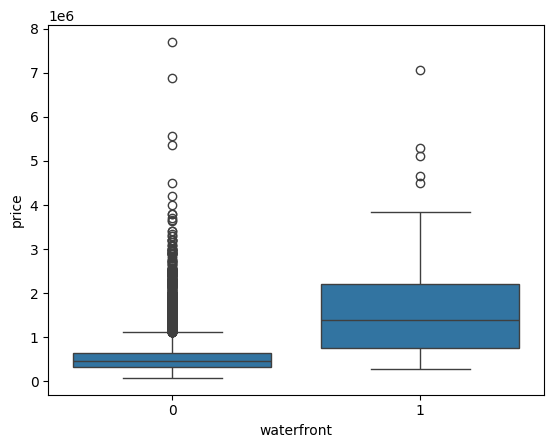

In [38]:
#Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers
sns.boxplot(x='waterfront',y='price',data=df)
# Houses without waterfront view have more outliers

<Axes: xlabel='sqft_above', ylabel='price'>

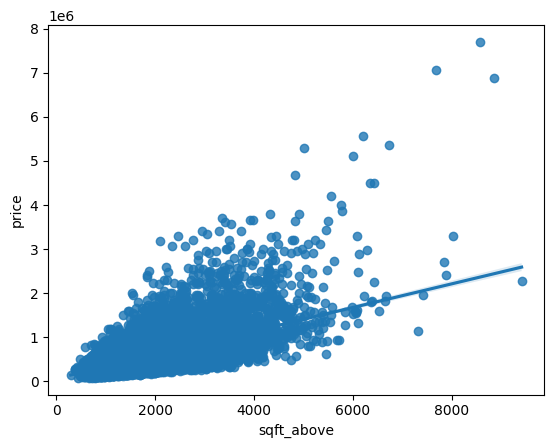

In [40]:
#Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
sns.regplot(x='sqft_above',y='price',data=df)
# The feature os positively related

In [46]:
# fit a linear regression model using long and find r2
lr = LinearRegression()
lr.fit(df[['long']],df['price'])
lr.score(df[['long']],df['price'])

0.00046769430149007363

In [47]:
# another model using sqft_living
lr2 = LinearRegression()
lr2.fit(df[['sqft_living']],df['price'])
lr2.score(df[['sqft_living']],df['price'])

0.4928532179037931

In [52]:
# Fit a linear regression model to predict the 'price' using the list of features:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
df[features] = df[features].astype(float)
lr3 = LinearRegression()
lr3.fit(df[features],df['price'])
lr3.score(df[features],df['price'])

0.6576372970735713

Now create a list of tuples, the first element of te tuple contains the name of estimator  
The second element in tuple contains the model constructor  
Store then in a list. Create a list of tuples

In [53]:
Input = [('scale', StandardScaler()) , ('poly',PolynomialFeatures(include_bias=False)) , ('model', LinearRegression())]

In [56]:
# Now use this list to create a pipe object to predict price.
# Fit the object using using the features in the list features and calculate R2
pipe = Pipeline(Input)
pipe.fit(df[features],df['price'])
pipe.score(df[features],df['price'])

0.7508598253545078

In [73]:
# For model evaluation and refinement we will split the data into training and testing subsets
x =df[features]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples: 3242
number of training samples: 18371


In [77]:
# create and fit a Ridge object using training data 
# set the regulization parameter to 0.1
# Then calculate R2 using test data
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.6478759163939116

In [91]:
# Perform a second order polynomial transform on both training and testing data
# Create and fit Ridge regression object using training data 
# set regulization parameter to 0.1
# calculate r2 using test data

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
ridge.fit(x_train_poly, y_train)
y_hat = ridge.predict(x_test_poly)
print(r2_score(y_test,y_hat))

0.700274426566343
